In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy.ma as ma
from sklearn import preprocessing


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_1d_file(file_path):
    """
    Load a 1D fMRI time-series file.
    
    Parameters:
        file_path (str): Path to the 1D file.
    
    Returns:
        np.ndarray: Array of time-series data.
    """
    if os.path.isfile(file_path):
        if os.access(file_path, os.R_OK):
            try:
                data = np.loadtxt(file_path)
                return data
            except Exception as e:
                print(f"Error loading file: {e}")
                return None
        else:
            print("File is not readable. Check file permissions.")
            return None
    else:
        print(f"File does not exist at the specified path: {file_path}")
        return None

def explore_1d_file(file_path):
    """
    Explore and understand a 1D fMRI time-series file.
    
    Parameters:
        file_path (str): Path to the 1D file.
    """
    data = load_1d_file(file_path)
    
    if data is not None:
        print(f"Data shape: {data.shape}")
        print(f"First 5 data points: {data[:5]}")
        plt.figure(figsize=(10, 5))
        plt.plot(data)
        plt.title('1D fMRI Time-Series Data')
        plt.xlabel('Time Points')
        plt.ylabel('Signal Intensity')
        plt.show()
    else:
        print("Failed to load data.")


Data shape: (146, 116)
First 5 data points: [[-2.5393320e+00  2.7475960e+00  1.1829770e+00  2.5386510e+00
   1.8868040e+00  4.9150480e+00 -1.4728120e+00 -4.8457330e+00
   2.5497440e+00  2.8463060e+00 -5.7927750e+00 -4.7733500e+00
  -4.2829120e+00  1.2023230e+00  7.3510700e-01  5.2152050e+00
   4.3947910e+00  5.5324310e+00 -1.9995830e+00  1.6777030e+00
   3.4388190e+00  6.3952000e-01  1.9500690e+00  5.2126910e+00
   4.2252150e+00  1.1466310e+01  3.6652270e+00  5.7474530e+00
  -1.6405250e+00  3.3012900e+00  5.4386800e-01  2.4370860e+00
   2.4618640e+00  8.2714080e+00  1.1536160e+00 -1.5084200e+00
  -9.5645600e-01 -6.1055100e-01 -2.5487490e+00 -3.5852500e+00
   1.0409735e+01  3.9903980e+00 -2.3232380e+00 -1.1872871e+01
  -2.9722780e+00  1.9305130e+00 -7.9941630e+00 -1.7139065e+01
  -2.6287640e+00 -2.7916240e+00  9.2582400e-01 -4.7270130e+00
   7.4324900e-01 -1.1092040e+00 -3.9576200e-01  8.9552400e-01
   8.3898900e-01  8.7769590e+00 -3.3693800e-01  3.2771390e+00
   1.1369800e+00  2.138043

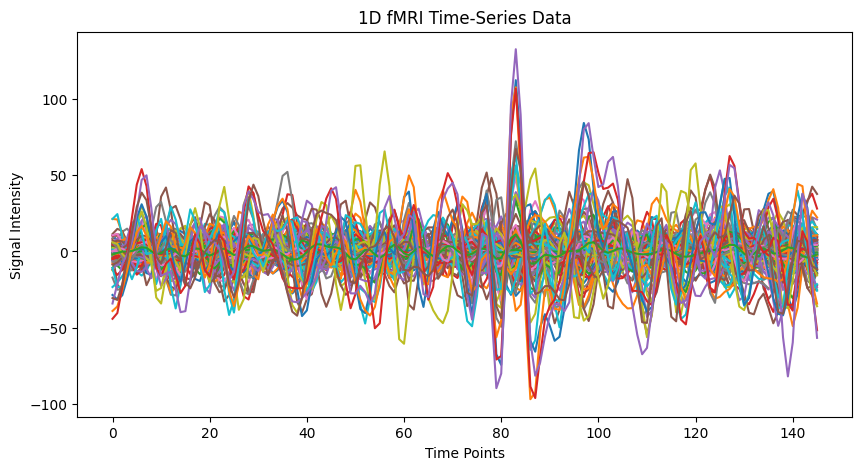

In [26]:
# Example usage
file_path = "/Users/sabrinebendimerad/Downloads/data/rois_aal/Caltech_0051456_rois_aal-1.1D"
explore_1d_file(file_path)

In [33]:
# Load the 1D file into a DataFrame to understand the shape 
df = pd.read_csv(file_path, sep="\s+", header=None)
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
ROIs = ["#" + str(i) for i in range(df.shape[1])]
df.columns = ROIs

print("DataFrame shape:", df.shape)
print("DataFrame loaded:")
df.head()

DataFrame shape: (147, 116)
DataFrame loaded:


,#0,#1,#2,#3,#4,#5,#6,#7,#8,#9,...,#106,#107,#108,#109,#110,#111,#112,#113,#114,#115
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.539332,2.747596,1.182977,2.538651,1.886804,4.915048,-1.472812,-4.845733,2.549744,2.846306,...,0.062848,5.767680,6.055776,-10.813158,-28.546896,-39.072069,-1.974431,-44.205788,-34.154533,-30.582543
2,-2.321754,-0.034424,1.901878,2.098236,2.484421,4.541738,-1.293605,-6.678593,3.060671,0.659669,...,1.962496,2.487070,4.908680,-23.337076,-31.550641,-36.098286,-0.989658,-40.406337,-21.266136,-31.774042
3,-0.643494,-3.851515,0.935755,-0.919723,1.869644,3.129760,-0.634238,-8.329076,2.016206,-1.119380,...,1.941306,-3.747752,-1.473718,-23.061787,-28.836708,-25.370281,-0.118625,-23.259346,-8.151164,-21.548872
4,2.144931,-4.198091,-1.795584,-5.477897,0.075232,1.585569,-0.260361,-10.644937,-0.484480,-3.468358,...,-0.262721,-7.625118,-5.092815,-5.577671,-18.145816,-12.643397,0.050530,-1.242075,-2.024758,-5.441643


In [31]:
# transform the data into a numpy array
functional = np.nan_to_num(df[ROIs].to_numpy().T).tolist()
print("Functional data after NaN replacement and transpose:")
print(functional[:1])  # Print the first row for brevity

print("-"*50)

# Scale the data
functional = preprocessing.scale(functional, axis=1)
print("Functional data after scaling:")
print(functional[:1])  # Print the first row for brevi

Functional data after NaN replacement and transpose:
[[0.0, -2.539332, -2.321754, -0.643494, 2.144931, 4.156425, 3.556201, 0.729206, -1.633136, -1.09179, 2.011754, 5.002143, 5.830677, 5.053585, 4.537877, 4.675084, 3.714709, 0.07715, -5.309082, -9.584782, -10.643613, -8.588822, -4.569375, 0.781849, 6.828261, 11.323062, 10.94511, 4.628621, -4.000169, -8.824362, -6.685501, -0.4141, 4.021663, 3.23267, -1.10626, -5.109441, -6.871269, -7.149321, -6.699857, -4.597825, 0.02496, 5.504105, 8.432035, 7.355084, 4.731008, 4.176364, 5.917586, 6.049297, 0.995978, -7.699251, -13.902729, -12.55028, -4.527426, 4.271867, 8.469111, 7.500389, 4.747632, 3.23992, 2.812981, 1.338685, -1.972283, -5.112377, -5.226796, -1.780608, 2.507001, 4.091264, 2.046378, -0.991058, -1.502036, 1.215016, 4.184928, 3.797995, -0.367248, -5.071249, -6.828704, -5.369154, -3.246524, -2.28527, -1.406774, 1.342409, 5.179365, 6.394675, 2.533667, -3.900243, -7.208221, -4.411586, 1.323233, 3.975391, 1.194106, -3.298243, -4.0644, 0.0463

In [32]:
# Compute the connectivity matrix
def compute_connectivity(functional):
    """
    Compute connectivity matrix from functional data.
    
    Parameters:
        functional (np.ndarray): Preprocessed functional data.
    
    Returns:
        np.ndarray: Connectivity matrix.
    """
    print("Shape of functional data inside compute_connectivity:", functional.shape)
    
    if functional.ndim != 2:
        raise ValueError("Input functional data must be a 2D array.")
    
    with np.errstate(invalid="ignore"):
        corr = np.nan_to_num(np.corrcoef(functional))
        print("Shape of correlation matrix:", corr.shape)
        
        if corr.shape[0] != corr.shape[1]:
            raise ValueError("Correlation matrix must be square.")
        
        mask = np.invert(np.tri(corr.shape[0], k=-1, dtype=bool))
        m = ma.masked_where(mask == 1, mask)
        return ma.masked_where(m, corr).compressed()


functional = compute_connectivity(functional)

Shape of functional data inside compute_connectivity: (116, 147)
Shape of correlation matrix: (116, 116)
